# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ruth Marelisa Hutagalung
- **Email:** marelisaruth@gmail.com
- **ID Dicoding:** Ruth Marelisa

## Menentukan Pertanyaan Bisnis

- Bagaimana korelasi antara cuaca (weathersit) dengan tingkat keterlibatan pengguna sepeda (casual dan registered)?
- Bagaimana perbandingan penggunaan sepeda antara hari kerja dan hari libur? Apakah terdapat perbedaan pola penggunaan sepeda antara kedua jenis hari tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### day_df

In [3]:
day_df = pd.read_csv('D:/Bangkit/submission-ruth/data/day.csv')
day_df.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510


### hour_df

In [4]:
hour_df = pd.read_csv('D:/Bangkit/submission-ruth/data/hour.csv')
hour_df.head(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2


### Assessing Data

### day_df

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### hour_df

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### day_df

In [13]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### hour_df

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore data_df

In [19]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [20]:
day_df.groupby(by="season").agg({
    "yr": "sum",
    "weekday": ["sum", "mean", "max", "std"]
})

yr weekday                        
       sum     sum      mean max       std
season                                    
1       91     543  3.000000   6  2.033060
2       92     550  2.989130   6  1.999970
3       94     570  3.031915   6  1.994389
4       89     528  2.966292   6  2.008172

In [21]:
day_df.groupby(by="weathersit").agg({
    "casual": ["sum", "mean", "min", "max"],
    "registered": ["sum", "mean", "min", "max"],
})

casual                       registered                        
               sum        mean min   max        sum         mean  min   max
weathersit                                                                 
1           446346  964.030238  15  3410    1811606  3912.755940  416  6946
2           169776  687.352227   9  3155     827082  3348.510121  491  6844
3             3895  185.476190   2  1264      33974  1617.809524   20  4324

In [22]:
day_df.groupby(by=["workingday", "holiday"]).agg({
    "cnt": ["sum", "mean", "max", "min"],
})

cnt                         
                        sum         mean   max   min
workingday holiday                                  
0          0         921834  4389.685714  8714   605
           1          78435  3735.000000  7403  1000
1          0        2292410  4584.820000  8362    22

In [23]:
day_df.groupby(by=["season", "weathersit"]).agg({
    "temp": ["mean", "max", "min"],
    "hum": ["mean", "max", "min"],
})

temp                           hum                    
                       mean       max       min      mean       max       min
season weathersit                                                            
1      1           0.301221  0.572500  0.059130  0.514689  0.835833  0.187917
       2           0.293678  0.514167  0.107500  0.696331  0.948261  0.407083
       3           0.268523  0.389091  0.217500  0.604271  0.862500  0.000000
2      1           0.563402  0.782500  0.264167  0.552617  0.831250  0.254167
       2           0.520739  0.808333  0.253043  0.739276  0.922500  0.489583
       3           0.365278  0.430833  0.268333  0.880694  0.918333  0.835417
3      1           0.720862  0.861667  0.507500  0.589422  0.790833  0.360000
       2           0.674583  0.815000  0.469167  0.735920  0.902083  0.485833
       3           0.592228  0.633913  0.540000  0.902255  0.939565  0.865417
4      1           0.404918  0.635000  0.220833  0.603229  0.775833  0.333478
       2           0.446267  0.657500  0.258333  0.734481  0.972500  0.491250
       3           0.456341  0.590833  0.254167  0.915813  0.970417  0.871667

In [24]:
day_df.groupby(by=["weekday", "workingday"]).agg({
    "cnt": ["sum", "mean", "max", "min"],
})

cnt                         
                       sum         mean   max   min
weekday workingday                                 
0       0           444027  4228.828571  8227   605
1       0            59605  3973.666667  6370  1000
        1           395898  4398.866667  7525    22
2       0             1013  1013.000000  1013  1013
        1           468096  4544.621359  7767   683
3       0             7403  7403.000000  7403  7403
        1           465645  4520.825243  8173   441
4       0             3920  1960.000000  2425  1495
        1           481475  4720.343137  7804   431
5       0             6494  3247.000000  3368  3126
        1           481296  4718.588235  8362  1167
6       0           477807  4550.542857  8714   627

In [25]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=True)

season
1     471348
4     841613
2     918589
3    1061129
Name: cnt, dtype: int64

In [26]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=True)

weathersit
3      37869
2     996858
1    2257952
Name: cnt, dtype: int64

In [27]:
day_df.groupby(by=["season","weathersit"]).cnt.sum().sort_values(ascending=True)

season  weathersit
2       3               3507
1       3               3739
3       3              11007
4       3              19616
1       2             155573
3       2             250679
2       2             288096
4       2             302510
1       1             312036
4       1             519487
2       1             626986
3       1             799443
Name: cnt, dtype: int64

In [28]:
day_df.groupby(by=["weekday", "workingday"]).cnt.sum().sort_values(ascending=True)

weekday  workingday
2        0               1013
4        0               3920
5        0               6494
3        0               7403
1        0              59605
         1             395898
0        0             444027
3        1             465645
2        1             468096
6        0             477807
5        1             481296
4        1             481475
Name: cnt, dtype: int64

### Explore hour_df

In [29]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [30]:
hour_df.groupby(by=["hr", "workingday"]).agg({
    "temp": ["mean", "max", "min"],
    "hum": ["mean", "max", "min", "std"],
})

temp                   hum                     
                   mean   max   min      mean  max   min       std
hr workingday                                                     
0  0           0.451478  0.82  0.04  0.673609  1.0  0.12  0.171690
   1           0.474798  0.82  0.06  0.699093  1.0  0.00  0.162281
1  0           0.443565  0.82  0.04  0.686826  1.0  0.14  0.167676
   1           0.466721  0.80  0.04  0.712308  1.0  0.00  0.159526
2  0           0.438509  0.82  0.02  0.697149  1.0  0.13  0.169592
   1           0.462094  0.78  0.02  0.726037  1.0  0.00  0.157156
3  0           0.432335  0.80  0.02  0.710176  1.0  0.14  0.160984
   1           0.463149  0.78  0.02  0.739255  1.0  0.27  0.150786
4  0           0.426696  0.78  0.02  0.722511  1.0  0.15  0.160636
   1           0.456255  0.76  0.02  0.751957  1.0  0.24  0.146407
5  0           0.425225  0.78  0.04  0.728694  1.0  0.15  0.156244
   1           0.441010  0.76  0.02  0.749313  1.0  0.00  0.150458
6  0           0.418079  0.80  0.02  0.731659  1.0  0.17  0.159442
   1           0.439113  0.76  0.02  0.749960  1.0  0.00  0.154063
7  0           0.421818  0.80  0.02  0.725108  1.0  0.17  0.158295
   1           0.447137  0.80  0.02  0.733609  1.0  0.00  0.154820
8  0           0.438701  0.84  0.02  0.698831  1.0  0.17  0.153719
   1           0.462581  0.84  0.02  0.704476  1.0  0.00  0.158322
9  0           0.460433  0.86  0.04  0.659654  1.0  0.16  0.159831
   1           0.484315  0.86  0.04  0.662641  1.0  0.00  0.165841
10 0           0.485974  0.92  0.04  0.611299  1.0  0.16  0.163880
   1           0.507379  0.90  0.06  0.618286  1.0  0.00  0.171012
11 0           0.506407  0.94  0.06  0.570433  1.0  0.16  0.169220
   1           0.530161  0.92  0.08  0.571895  1.0  0.00  0.174811
12 0           0.527273  0.96  0.06  0.533896  1.0  0.18  0.174320
   1           0.546318  0.96  0.10  0.538008  1.0  0.00  0.176738
13 0           0.542078  0.96  0.08  0.509091  1.0  0.16  0.175568
   1           0.560602  0.94  0.14  0.512751  1.0  0.00  0.178882
14 0           0.550909  0.96  0.10  0.495195  1.0  0.15  0.180087
   1           0.571647  0.96  0.14  0.497811  1.0  0.00  0.182373
15 0           0.552641  0.96  0.12  0.493160  1.0  0.16  0.188797
   1           0.576024  0.96  0.16  0.491647  1.0  0.00  0.184651
16 0           0.550649  1.00  0.12  0.494372  1.0  0.16  0.190488
   1           0.571583  0.96  0.14  0.496453  1.0  0.00  0.188835
17 0           0.540260  0.96  0.12  0.511515  1.0  0.16  0.190231
   1           0.561202  0.98  0.14  0.514329  1.0  0.00  0.193078
18 0           0.524696  0.94  0.08  0.536261  1.0  0.18  0.185498
   1           0.548795  0.96  0.12  0.535863  1.0  0.00  0.190443
19 0           0.506174  0.92  0.08  0.583913  1.0  0.16  0.186520
   1           0.532490  0.90  0.12  0.567149  1.0  0.00  0.183985
20 0           0.492783  0.90  0.06  0.609870  1.0  0.20  0.180735
   1           0.515904  0.92  0.10  0.597590  1.0  0.00  0.180549
21 0           0.479130  0.88  0.06  0.637783  1.0  0.19  0.175220
   1           0.502771  0.86  0.08  0.628655  1.0  0.00  0.174437
22 0           0.470696  0.84  0.06  0.657957  1.0  0.20  0.175715
   1           0.490884  0.84  0.06  0.650924  1.0  0.00  0.171405
23 0           0.460522  0.84  0.04  0.677609  1.0  0.23  0.166526
   1           0.481727  0.82  0.06  0.671265  1.0  0.00  0.169172

In [31]:
hour_df.groupby(by=["hr", "weekday"]).agg({
    "temp": ["mean", "max", "min", "sum"],
    "hum": ["mean", "max", "min", "std"],
})

temp                          hum                      
                mean   max   min    sum      mean   max   min       std
hr weekday                                                             
0  0        0.451538  0.82  0.04  46.96  0.675385  1.00  0.24  0.167940
   1        0.456190  0.76  0.06  47.90  0.711143  1.00  0.26  0.161408
   2        0.484158  0.74  0.14  48.90  0.705644  1.00  0.26  0.160944
   3        0.474231  0.80  0.08  49.32  0.712308  1.00  0.32  0.166764
   4        0.479612  0.76  0.14  49.40  0.683786  1.00  0.00  0.177968
...              ...   ...   ...    ...       ...   ...   ...       ...
23 2        0.482308  0.80  0.10  50.16  0.697981  1.00  0.32  0.165467
   3        0.487767  0.78  0.14  50.24  0.676408  0.94  0.23  0.174040
   4        0.479231  0.80  0.12  49.84  0.653269  1.00  0.00  0.164053
   5        0.467885  0.82  0.06  48.66  0.647981  1.00  0.08  0.172494
   6        0.460385  0.84  0.04  47.88  0.658750  1.00  0.23  0.172928

[168 rows x 8 columns]

In [32]:
hour_df.groupby(by=["hr", "season"]).agg({
    "temp": ["mean", "max", "min", "sum"],
    "hum": ["mean", "max", "min", "std"],
})

temp                           hum                     
               mean   max   min     sum      mean  max   min       std
hr season                                                             
0  1       0.280674  0.60  0.04   49.96  0.622416  1.0  0.00  0.180393
   2       0.512935  0.74  0.22   94.38  0.688098  1.0  0.23  0.180960
   3       0.665348  0.82  0.42  124.42  0.719465  1.0  0.33  0.130889
   4       0.398757  0.64  0.20   70.58  0.732994  1.0  0.37  0.143944
1  1       0.274719  0.58  0.04   48.90  0.635955  1.0  0.00  0.181309
...             ...   ...   ...     ...       ...  ...   ...       ...
22 4       0.410621  0.66  0.20   72.68  0.696780  1.0  0.33  0.152074
23 1       0.288222  0.60  0.04   51.88  0.602833  1.0  0.00  0.183991
   2       0.525978  0.78  0.24   96.78  0.671141  1.0  0.23  0.181127
   3       0.674225  0.84  0.44  126.08  0.696845  1.0  0.33  0.135457
   4       0.401582  0.66  0.20   71.08  0.722203  1.0  0.38  0.144652

[96 rows x 8 columns]

In [33]:
hour_df.groupby(by=["hr", "season", "weekday", "workingday"]).agg({
    "temp": ["mean", "max", "min", "std"],
    "hum": ["mean", "max", "min"],
})

temp                             hum        \
                                  mean   max   min       std      mean   max   
hr season weekday workingday                                                   
0  1      0       0           0.268889  0.46  0.04  0.109591  0.591481  0.88   
          1       0           0.256667  0.40  0.14  0.095847  0.561667  0.87   
                  1           0.248000  0.48  0.06  0.098280  0.590000  1.00   
          2       0           0.240000  0.24  0.24       NaN  0.930000  0.93   
                  1           0.280909  0.56  0.14  0.110837  0.636364  1.00   
...                                ...   ...   ...       ...       ...   ...   
23 4      4       0           0.320000  0.34  0.30  0.028284  0.730000  0.76   
                  1           0.400870  0.62  0.24  0.123653  0.678696  0.88   
          5       0           0.300000  0.30  0.30       NaN  0.450000  0.45   
                  1           0.391667  0.58  0.26  0.104160  0.674167  1.00   
          6       0           0.369600  0.60  0.20  0.101836  0.690400  0.94   

                                    
                               min  
hr season weekday workingday        
0  1      0       0           0.30  
          1       0           0.40  
                  1           0.26  
          2       0           0.93  
                  1           0.37  
...                            ...  
23 4      4       0           0.70  
                  1           0.46  
          5       0           0.45  
                  1           0.38  
          6       0           0.41  

[887 rows x 7 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana korelasi antara cuaca (weathersit) dengan tingkat keterlibatan pengguna sepeda (casual dan registered)?

Korelasi untuk Tahun 2011:
            weathersit    casual  registered
weathersit    1.000000 -0.159279   -0.118628
casual       -0.159279  1.000000    0.518816
registered   -0.118628  0.518816    1.000000


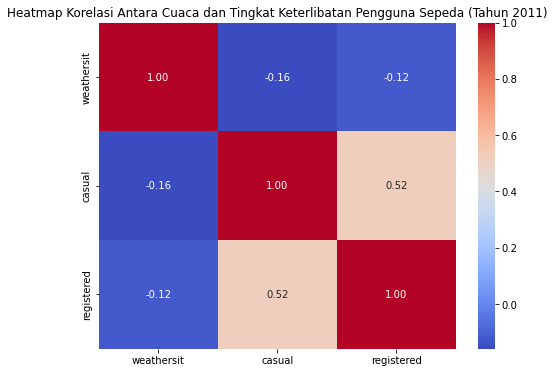

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data dari file CSV
data = pd.read_csv('D:/Bangkit/submission-ruth/data/hour.csv')

# Konversi kolom 'tanggal' menjadi tipe data datetime
data['tanggal'] = pd.to_datetime(data['dteday'])

# Filter data untuk tahun 2011
data_2011 = data[data['tanggal'].dt.year == 2011]

# Hitung korelasi antara cuaca (weathersit) dengan tingkat keterlibatan pengguna sepeda (casual dan registered)
correlation = data_2011[['weathersit', 'casual', 'registered']].corr()

print("Korelasi untuk Tahun 2011:")
print(correlation)

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
plt.title('Heatmap Korelasi Antara Cuaca dan Tingkat Keterlibatan Pengguna Sepeda (Tahun 2011)')
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Korelasi untuk Tahun 2012:
            weathersit    casual  registered
weathersit    1.000000 -0.151752   -0.127340
casual       -0.151752  1.000000    0.480349
registered   -0.127340  0.480349    1.000000


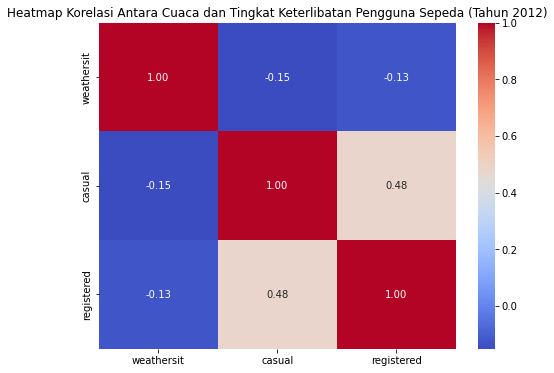

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Baca data dari file CSV
data = pd.read_csv('D:/Bangkit/submission-ruth/data/hour.csv')

# Konversi kolom 'tanggal' menjadi tipe data datetime
data['tanggal'] = pd.to_datetime(data['dteday'])

# Filter data untuk tahun 2012
data_2012 = data[data['tanggal'].dt.year == 2012]

# Hitung korelasi antara cuaca (weathersit) dengan tingkat keterlibatan pengguna sepeda (casual dan registered)
correlation = data_2012[['weathersit', 'casual', 'registered']].corr()

print("Korelasi untuk Tahun 2012:")
print(correlation)

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
plt.title('Heatmap Korelasi Antara Cuaca dan Tingkat Keterlibatan Pengguna Sepeda (Tahun 2012)')
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


### Pertanyaan 2: Bagaimana perbandingan penggunaan sepeda antara hari kerja dan hari libur? Apakah terdapat perbedaan pola penggunaan sepeda antara kedua jenis hari tersebut?

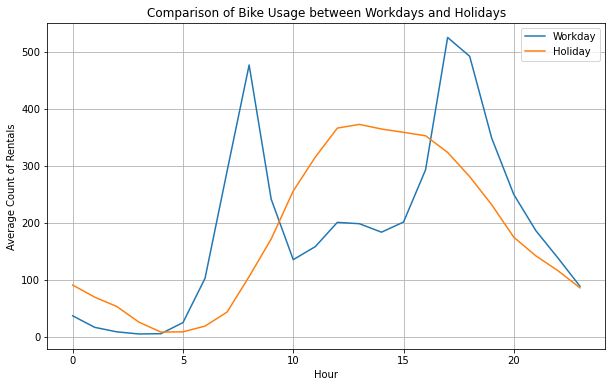

In [43]:
# Menghitung total peminjaman sepeda per hari
daily_rentals = day_df.groupby('dteday')[['casual', 'registered', 'cnt']].sum().reset_index()

# Menggabungkan data hari dengan data jam
merged_df = pd.merge(hour_df, daily_rentals, on='dteday', suffixes=('_hour', '_day'))

# Membuat kolom baru untuk menandai apakah hari tersebut merupakan hari kerja atau hari libur
merged_df['is_workday'] = merged_df['workingday'].apply(lambda x: 'Workday' if x == 1 else 'Holiday')

# Menghitung total peminjaman sepeda per jam berdasarkan jenis hari
hourly_rentals_by_daytype = merged_df.groupby(['hr', 'is_workday'])[['casual_hour', 'registered_hour', 'cnt_hour']].mean().reset_index()

# Plot perbandingan penggunaan sepeda antara hari kerja dan hari libur
plt.figure(figsize=(10, 6))

for day_type in ['Workday', 'Holiday']:
    data = hourly_rentals_by_daytype[hourly_rentals_by_daytype['is_workday'] == day_type]
    plt.plot(data['hr'].values, data['cnt_hour'].values, label=day_type)

plt.xlabel('Hour')
plt.ylabel('Average Count of Rentals')
plt.title('Comparison of Bike Usage between Workdays and Holidays')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
day_df.to_csv("all_data.csv", index=False)

## Conclusion

- Conclusion pertanyaan 1
    Kesimpulan utama dari hasil korelasi untuk tahun 2011 dan 2012 adalah bahwa terdapat hubungan negatif antara kondisi cuaca dengan jumlah peminjam sepeda. Artinya, semakin buruk cuaca, semakin sedikit orang yang meminjam sepeda. Meskipun demikian, korelasi tersebut tidak sangat kuat, menunjukkan bahwa faktor-faktor lain juga memengaruhi jumlah peminjam sepeda. Oleh karena itu, sementara cuaca memainkan peran dalam menentukan tingkat peminjaman sepeda, faktor-faktor lain seperti musim, acara, atau promosi juga memiliki dampak yang signifikan.
- Conclusion pertanyaan 2
    Rata-rata penggunaan sepeda lebih tinggi pada hari kerja daripada pada hari libur.
    Pada hari kerja, rata-rata penggunaan sepeda mencapai sekitar 400.
    Pada hari libur, rata-rata penggunaan sepeda turun menjadi sekitar 200.
    Terdapat perbedaan signifikan dalam penggunaan sepeda antara hari kerja dan hari libur.
    Perbedaannya mencapai sekitar 200 poin.
    Pola penggunaan sepeda menunjukkan bahwa orang lebih memilih menggunakan sepeda untuk beraktivitas pada hari kerja.
    Hal ini kemungkinan karena pada hari kerja, orang menggunakan sepeda untuk berangkat dan pulang kerja.
    Pada hari libur, orang mungkin lebih memilih untuk menggunakan kendaraan lain atau melakukan aktivitas yang tidak memerlukan sepeda.